In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
df = pd.read_csv("../data/data_cleaned.csv", low_memory=False)
df.head()

,Runner ID,First Name,Surname,Nat.,Gender,Age,Age Group,Cat,YOB,Race Count,...,Cat. Rank,Finish Percentage,Performance Ratio,Distance/Time,Distance KM,Terrain,Time Seconds Finish,Distance Finish,Average Speed,Avg.Speed km/h
0,1354671,Allen,Boyce,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,1.0,0.1,1.000000,87km,87.0,road,23963.0,NaN,275.436782,13.070
1,1384818,Dermock,Parr,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,2.0,0.2,0.783335,87km,87.0,road,30591.0,NaN,351.620690,10.238
2,1384846,Gordon,Morrison,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,3.0,0.3,0.746023,87km,87.0,road,32121.0,NaN,369.206897,9.751
3,1384834,Max,Trimborn,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,4.0,0.4,0.734881,87km,87.0,road,32608.0,NaN,374.804598,9.605
4,1384824,Edgar,Marie,RSA,M,53.0,50-59,M50,1887.0,0.0,...,1.0,0.5,0.731315,87km,87.0,road,32767.0,NaN,376.632184,9.558


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

In [4]:
df.columns

Index(['Runner ID', 'First Name', 'Surname', 'Nat.', 'Gender', 'Age',
       'Age Group', 'Cat', 'YOB', 'Race Count', 'Cumulative Distance KM',
       'Event ID', 'Event', 'Event Type', 'Date', 'Race Location',
       'Elevation Gain', 'Elevation Gain per KM', 'Total Finishers',
       'Male Finishers', 'Female Finishers', 'Time Seconds Winner',
       'Distance Winner', 'Rank', 'Rank M/F', 'Cat. Rank', 'Finish Percentage',
       'Performance Ratio', 'Distance/Time', 'Distance KM', 'Terrain',
       'Time Seconds Finish', 'Distance Finish', 'Average Speed',
       'Avg.Speed km/h', 'Year'],
      dtype='object')

### Historic analysis

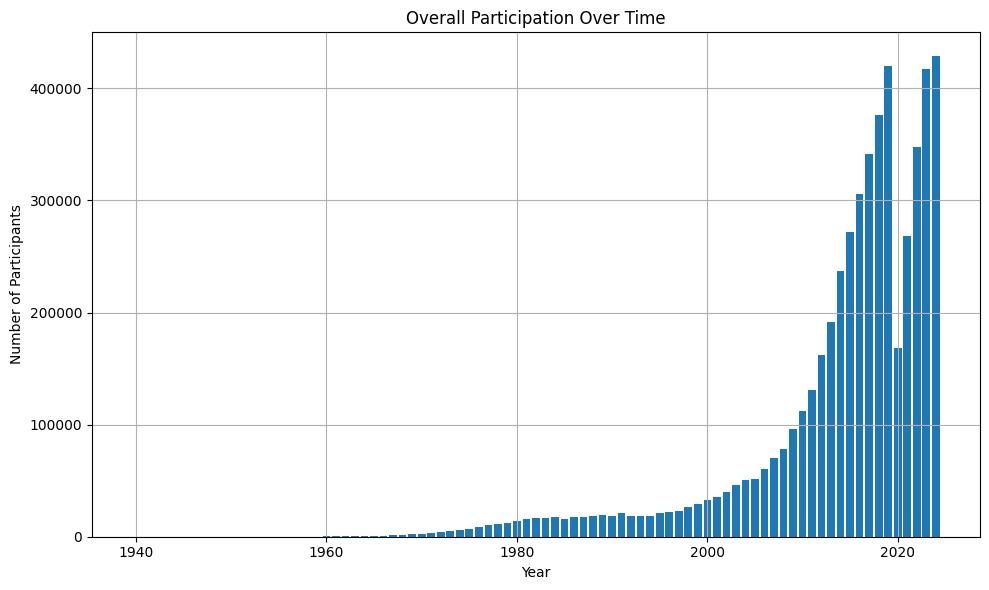

In [8]:
import matplotlib.pyplot as plt

# 1. Group by Year and count unique participants
yearly_counts = df.groupby('Year')['Runner ID'].nunique().reset_index(name='Total_Participants')

# 2. Plot a line or bar chart of total participants over time
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['Year'], yearly_counts['Total_Participants'])
plt.title('Overall Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.tight_layout()
plt.show()

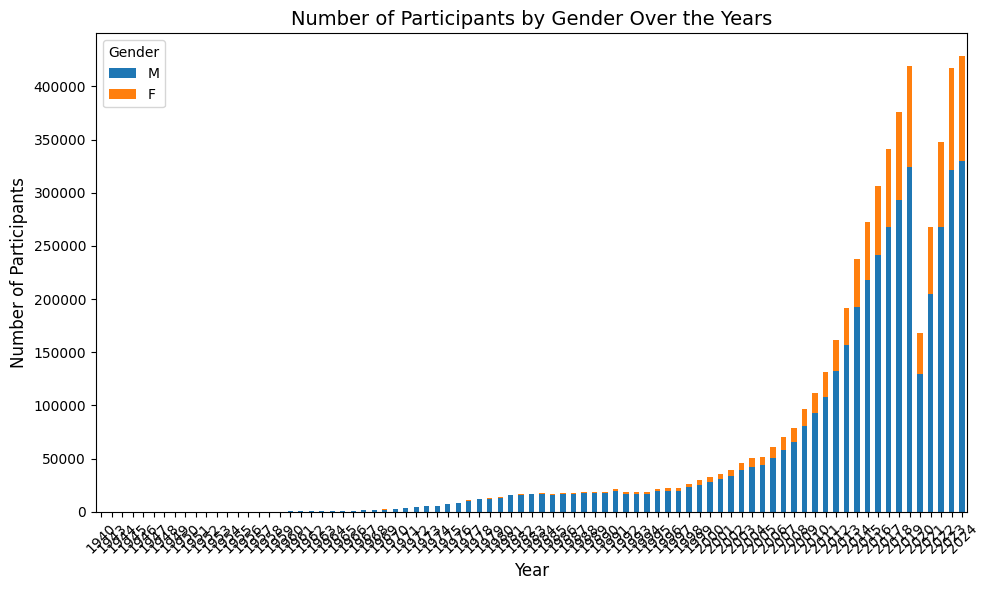

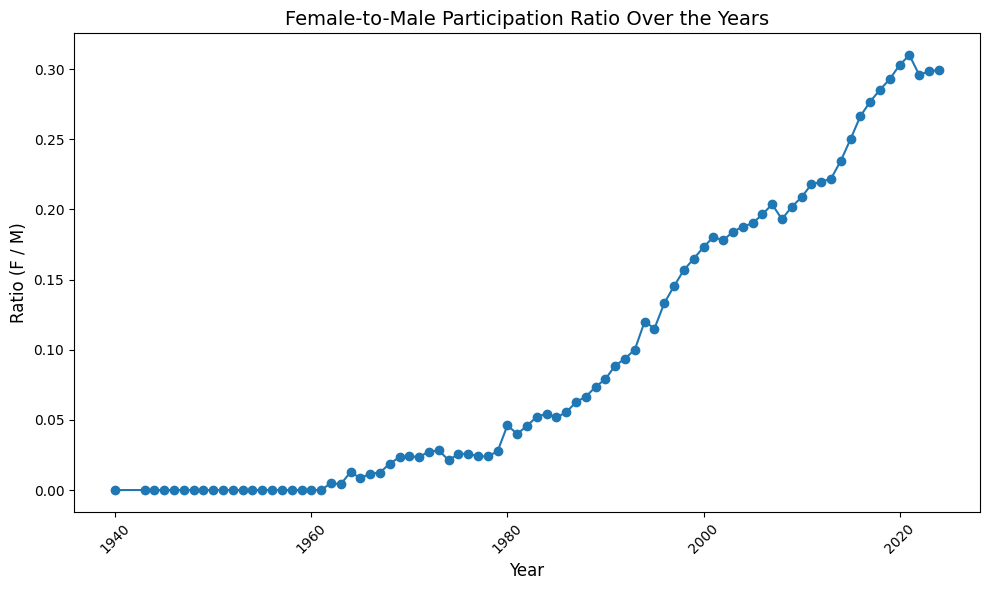

In [6]:
# Gender Ratio Over Time

# Group by both Year and Gender, then count unique runners
gender_counts = df.groupby(['Year', 'Gender'])['Runner ID'].nunique().reset_index(name='Count')

# Pivot the data so that each Year is a row, and each Gender is a column
gender_pivot = gender_counts.pivot(index='Year', columns='Gender', values='Count').fillna(0)

# If you have only 'M' and 'F', create a ratio column
if 'M' in gender_pivot.columns and 'F' in gender_pivot.columns:
    gender_pivot['Female_to_Male_Ratio'] = gender_pivot['F'] / gender_pivot['M']

# Plot a stacked bar chart of male vs. female participants by year
gender_pivot[['M', 'F']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Participants by Gender Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if 'Female_to_Male_Ratio' in gender_pivot.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(gender_pivot.index, gender_pivot['Female_to_Male_Ratio'], marker='o', linestyle='-')
    plt.title('Female-to-Male Participation Ratio Over the Years', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Ratio (F / M)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [9]:
# 5. Identify Key Participation Surges or Dips

# You might look at the year-over-year change in total participants
yearly_counts['YoY_Change'] = yearly_counts['Total_Participants'].diff()

# Find the largest increases or decreases
top_5_increases = yearly_counts.nlargest(5, 'YoY_Change')
top_5_decreases = yearly_counts.nsmallest(5, 'YoY_Change')

print("Top 5 biggest year-over-year participation increases:")
print(top_5_increases)

print("\nTop 5 biggest year-over-year participation decreases:")
print(top_5_decreases)  

Top 5 biggest year-over-year participation increases:
    Year  Total_Participants  YoY_Change
79  2021              267952     99720.0
80  2022              347531     79579.0
81  2023              417627     70096.0
72  2014              237290     45901.0
77  2019              419579     43285.0

Top 5 biggest year-over-year participation decreases:
    Year  Total_Participants  YoY_Change
78  2020              168232   -251347.0
50  1992               18096     -3501.0
43  1985               16222     -1117.0
48  1990               18513      -499.0
52  1994               18480      -355.0


[Text(0, 0.0, '0%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.5, '50%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.7000000000000001, '70%'),
 Text(0, 0.8, '80%'),
 Text(0, 0.9, '90%'),
 Text(0, 1.0, '100%')]

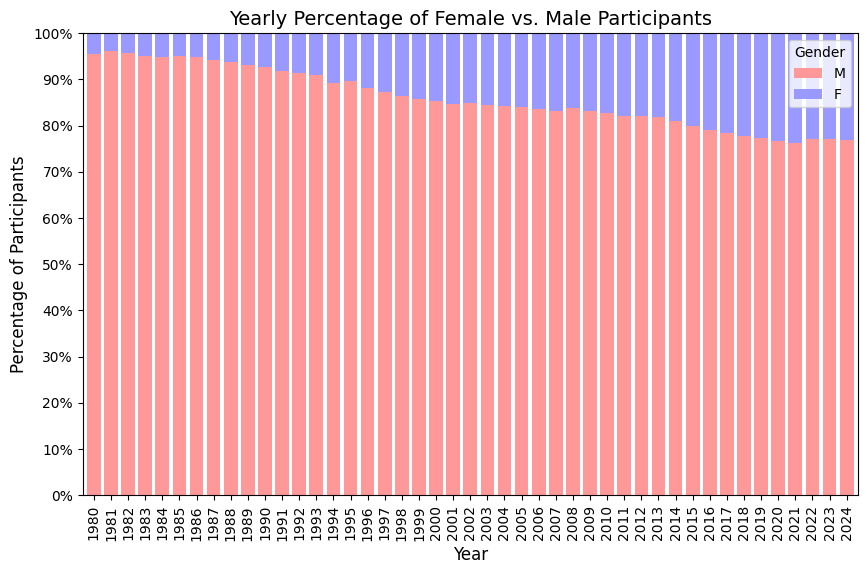

In [10]:
year_gender_counts = (
    df.groupby(['Year', 'Gender'])['Runner ID']
    .nunique()         # or .count() if each row = 1 participant
    .reset_index(name='Count')
)

# Pivot so each gender is a column
gender_pivot = year_gender_counts.pivot(
    index='Year', 
    columns='Gender', 
    values='Count'
).fillna(0)

gender_proportions = gender_pivot.div(gender_pivot.sum(axis=1), axis=0)

# Filter rows: keep only years >= 1980
gender_proportions = gender_proportions.loc[gender_proportions.index >= 1980]

# Filter columns: keep only M, F (in case the pivot had other columns)
gender_proportions = gender_proportions[['M', 'F']]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot as a stacked bar, where each row sums to 1
gender_proportions.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=['#ff9999', '#9999ff']  # Adjust color palette as desired (F, M)
)

ax.set_title('Yearly Percentage of Female vs. Male Participants', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of Participants', fontsize=12)

# Format y-axis to show percentages rather than decimal 0–1
# Option 1: Just set limits and use a percentage label
ax.set_ylim(0, 1)  # Because each bar now sums to 1
ax.set_yticks([i * 0.1 for i in range(11)])  # 0, 0.1, 0.2, ..., 1.0
ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])

### Key factors determining participation

In [13]:
race_agg = df.groupby('Event ID').agg({
    'Event': 'first',
    'Race Location': 'first',
    'Event Type': 'first',
    'Terrain': 'first',
    'Distance Winner': 'first',          # Use as the race distance (in km)
    'Elevation Gain': 'first',
    'Total Finishers': 'first',
    'Male Finishers': 'first',
    'Female Finishers': 'first',
    'Year': 'first',
    'Decade': 'first',
    'Date': 'first'
}).reset_index()

# Rename columns to match our model's expected names
race_agg.rename(columns={
    'Distance Winner': 'Distance_km'
}, inplace=True)

# Calculate the female participation rate as a proportion (0 to 1)
race_agg['Female_Participation'] = race_agg['Female Finishers'] / race_agg['Total Finishers']

# Optional: rearrange columns to a preferred order
race_level_df = race_agg[['Event ID', 'Event', 'Race Location', 'Event Type', 'Terrain',
                          'Distance_km', 'Elevation Gain', 'Total Finishers',
                          'Male Finishers', 'Female Finishers', 'Female_Participation',
                          'Year', 'Decade', 'Date']]

# Only consider races from 1980
race_level_df = race_level_df[race_level_df['Year']>=1980]
print(race_level_df.head())

   Event ID                                              Event Race Location  \
0       1.0                   Edersee Supermarathon 60km (GER)           GER   
1       2.0    20ème des 48 heures pédestres de Surgères (FRA)           FRA   
2       3.0  20ème des 48 heures pédestres de Surgères - 24...           FRA   
3       4.0  20ème des 48 heures pédestres de Surgères - 12...           FRA   
4       5.0  20ème des 48 heures pédestres de Surgères - 6h...           FRA   

  Event Type Terrain  Distance_km  Elevation Gain  Total Finishers  \
0   Distance   trail          NaN             NaN             84.0   
1       Time   track      405.639             NaN             24.0   
2       Time   track      230.716             NaN             24.0   
3       Time   track      126.969             NaN             24.0   
4       Time   track       66.651             NaN             24.0   

   Male Finishers  Female Finishers  Female_Participation  Year  Decade  \
0            73.0      

Mean Absolute Error: 0.095
R^2 Score: 0.240


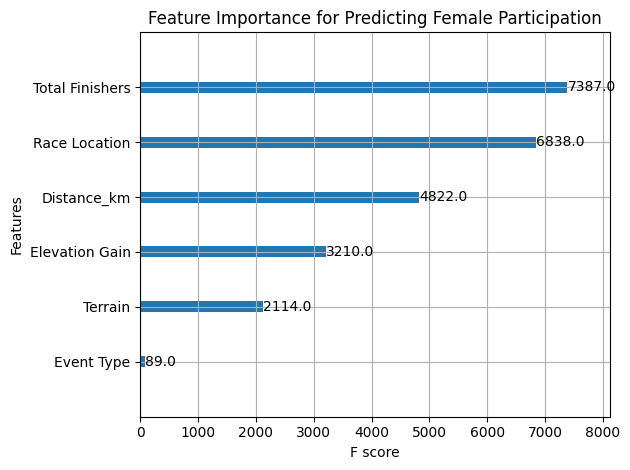

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
categorical_cols = ['Race Location', 'Terrain', 'Event Type']
for col in categorical_cols:
    le = LabelEncoder()
    race_level_df[col] = le.fit_transform(race_level_df[col])

# Define features and target
features = ['Race Location', 'Distance_km', 'Elevation Gain', 'Terrain', 'Total Finishers', 'Event Type']
X = race_level_df[features]
y = race_level_df['Female_Participation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost regressor
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance for Predicting Female Participation")
plt.tight_layout()
plt.show()

Mean Absolute Error: 0.096
R^2 Score: 0.190
           Feature  Importance
5  Total Finishers    0.297235
0    Race Location    0.288710
3      Distance_km    0.224300
4   Elevation Gain    0.107723
2          Terrain    0.072409
1       Event Type    0.009623


/var/folders/ss/kjxldrfs36qgygzmg25sqy100000gn/T/ipykernel_28993/1160483328.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


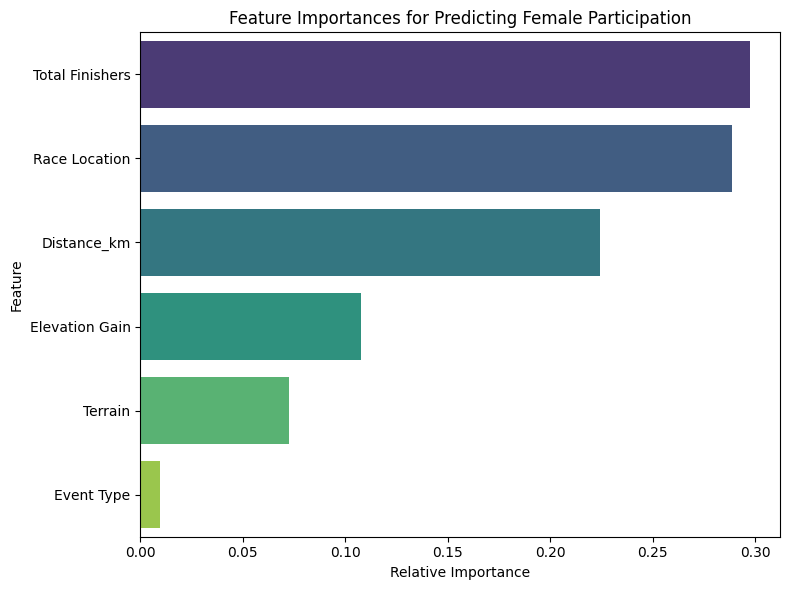

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have the aggregated race-level DataFrame called race_level_df with columns:
# ['Event ID', 'Event', 'Race Location', 'Event Type', 'Terrain', 'Distance_km',
#  'Elevation Gain', 'Total Finishers', 'Male Finishers', 'Female Finishers',
#  'Female_Participation', 'Year', 'Decade', 'Date']

# For modeling, we'll drop columns that are not predictive
df_model = race_level_df.drop(columns=['Event ID', 'Event', 'Date', 'Male Finishers', 'Female Finishers'])

# Identify categorical columns and encode them
cat_cols = ['Race Location', 'Event Type', 'Terrain', 'Decade']
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# Define features (X) and target (y)
features = ['Race Location', 'Event Type', 'Terrain', 'Distance_km', 'Elevation Gain', 'Total Finishers']
X = df_model[features]
y = df_model['Female_Participation']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Get feature importances and create a DataFrame for them
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances for Predicting Female Participation')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

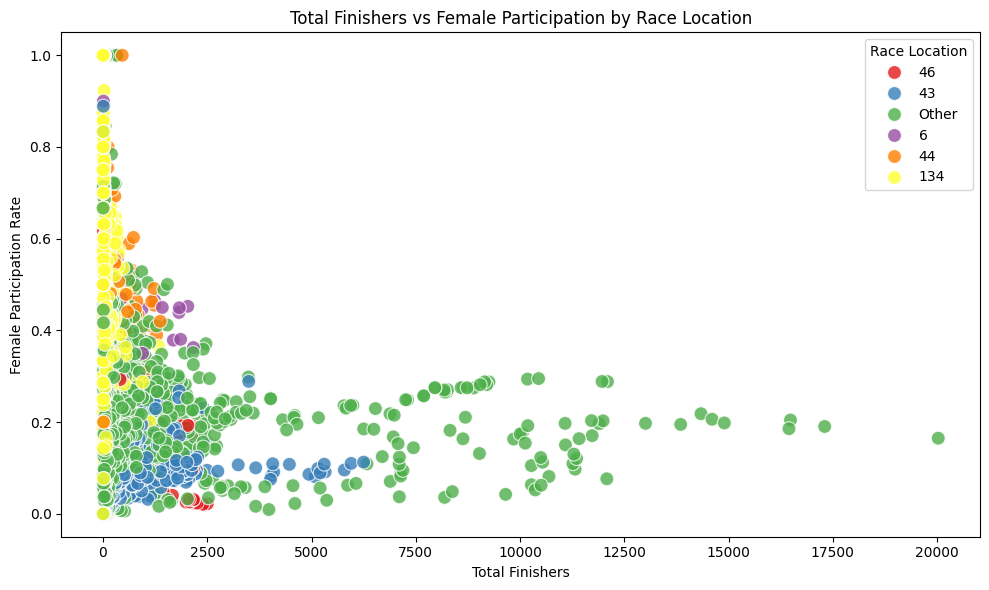

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the top 5 race locations by number of events
top5_locations = race_level_df['Race Location'].value_counts().nlargest(5).index.tolist()

# Create a new column grouping race locations into top 5 or 'Other'
race_level_df['Race_Location_Group'] = race_level_df['Race Location'].apply(lambda x: x if x in top5_locations else 'Other')

# Plot Total Finishers vs. Female_Participation, coloured by the new Race_Location_Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=race_level_df, 
                x='Total Finishers', 
                y='Female_Participation', 
                hue='Race_Location_Group', 
                palette='Set1', 
                s=100, 
                alpha=0.8)
plt.title('Total Finishers vs Female Participation by Race Location')
plt.xlabel('Total Finishers')
plt.ylabel('Female Participation Rate')
plt.legend(title='Race Location')
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a TreeExplainer for our model
explainer = shap.TreeExplainer(rf_model)
# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot: shows feature importance and effect
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance for Predicting Female Participation")
plt.tight_layout()
plt.show()

# For a detailed view, you can also create a SHAP summary dot plot:
shap.summary_plot(shap_values, X_test)